In [26]:
import pandas as pd
import numpy as np
from transform_waze_raw_functions import *
import math
import matplotlib.pyplot as plt
import datetime

In [2]:
alerts = pd.read_csv('data/al_complete.csv')
jams = pd.read_csv('data/jm_complete.csv')
irregularities = pd.read_csv('data/irr_complete.csv')

### Alerts

In [3]:
%%time
al = transform_alerts(alerts)

CPU times: user 54 s, sys: 1.54 s, total: 55.5 s
Wall time: 55.9 s


In [4]:
al.shape

(1751503, 18)

In [5]:
al.dtypes

uuid                            object
city                            object
state                           object
country                         object
confidence                       int64
location                        object
magvar                           int64
thumbs_up                        int64
reliability                      int64
report_description              object
report_by_municipality_user    float64
report_rating                    int64
road_type                       object
street                          object
subtype                         object
type                            object
pub_millis                       int64
pub_utc_date                    object
dtype: object

In [6]:
cols_categorical_data = []
for col in al.columns[al.dtypes == object]:
    s = al[pd.isnull(al[col])].shape[0]
    cols_categorical_data.append({
        'Col': col,
        'NumVals': al[col].value_counts().shape[0],
        'PctNumVals': al[col].value_counts().shape[0]/al.shape[0],
        'MaxValCount': al[col].value_counts().max(),
        'PctMaxValCount': al[col].value_counts().max()/al.shape[0],
        'NumNaNs': s,
        'PctNaNs': s/al.shape[0]
    })
cols_categorical_data_pd = pd.DataFrame(cols_categorical_data) 
cols_categorical_data_pd

,Col,MaxValCount,NumNaNs,NumVals,PctMaxValCount,PctNaNs,PctNumVals
0,uuid,40627,0,80709,0.023196,0.000000,4.607985e-02
1,city,1751503,0,1,1.000000,0.000000,5.709382e-07
2,state,1751503,0,1,1.000000,0.000000,5.709382e-07
3,country,1751503,0,1,1.000000,0.000000,5.709382e-07
4,location,63276,0,87252,0.036127,0.000000,4.981550e-02
5,report_description,62060,1598930,496,0.035432,0.912890,2.831854e-04
6,road_type,840776,0,9,0.480031,0.000000,5.138444e-06
7,street,211139,161175,984,0.120547,0.092021,5.618032e-04
8,subtype,334070,90666,25,0.190733,0.051765,1.427346e-05
9,type,776265,0,4,0.443199,0.000000,2.283753e-06


In [7]:
al['type'].value_counts()

WEATHERHAZARD    776265
JAM              725729
ROAD_CLOSED      204061
ACCIDENT          45448
Name: type, dtype: int64

### User behavior

In [18]:
list_user = al.groupby('uuid').count()['city'].tolist()

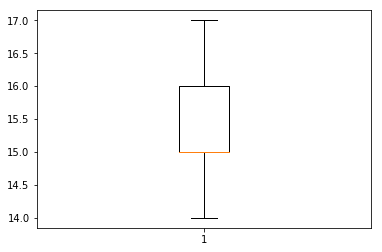

In [20]:
plt.boxplot(list_user, showfliers=False)
plt.show()

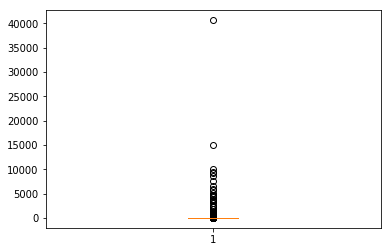

In [21]:
plt.boxplot(list_user, showfliers=True)
plt.show()

More than 40000 alerts ?

In [34]:
al['hour'] = al.pub_utc_date.str[11:13]

In [37]:
al['day'] = al.pub_utc_date.str[:10]

In [54]:
def get_weekday(i):
    return datetime.datetime.strptime(i, '%Y-%m-%d').isoweekday()

In [55]:
al['weekday'] = al['day'].apply(get_weekday)

/Users/Louis/Documents/4A/3_Semester/Capstone/Sandbox/capstone_env/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


hour
00    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
01    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
02    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
03    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
04    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
05    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
06    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
07    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
08    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
09    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
10    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
11    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
12    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
13    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
14    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
15    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
16    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
17    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
18    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
19    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
20    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
21    [[

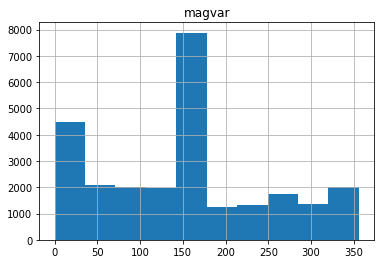

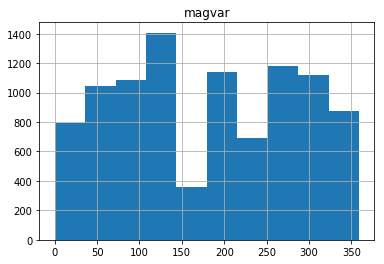

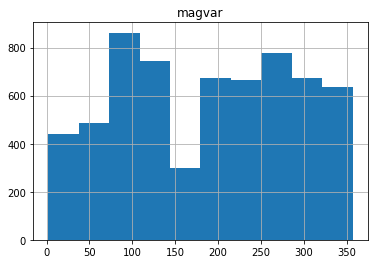

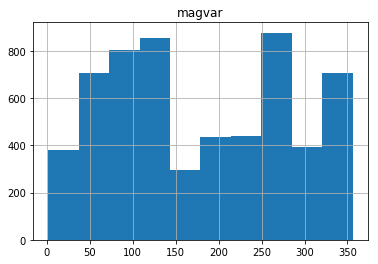

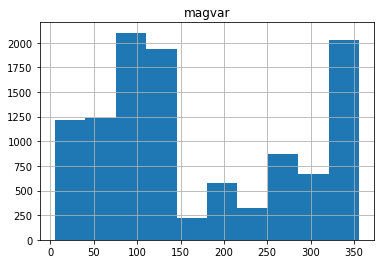

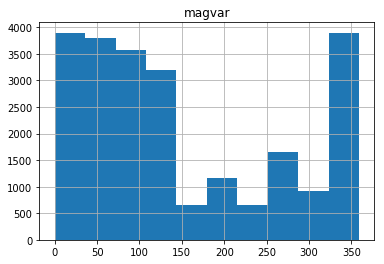

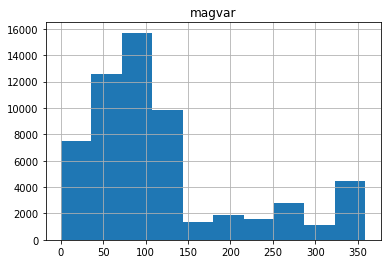

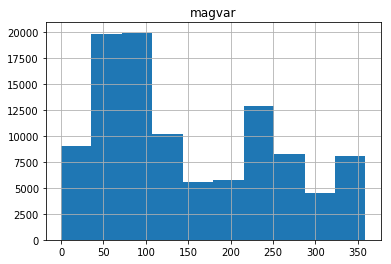

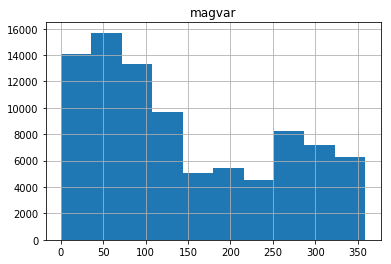

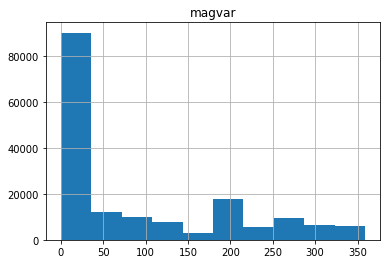

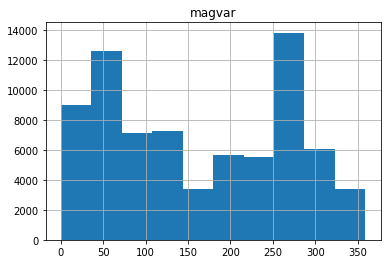

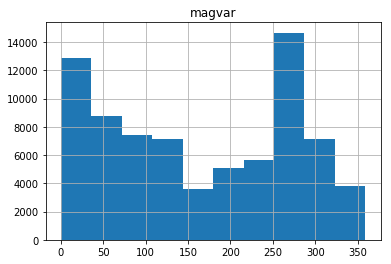

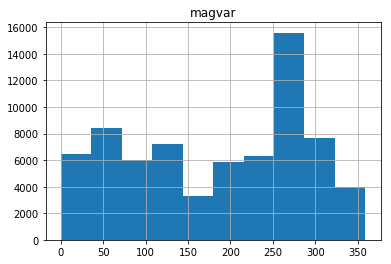

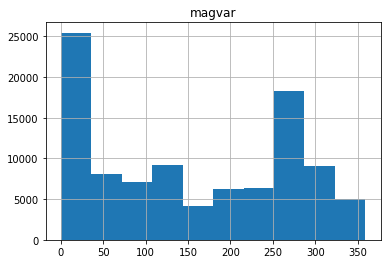

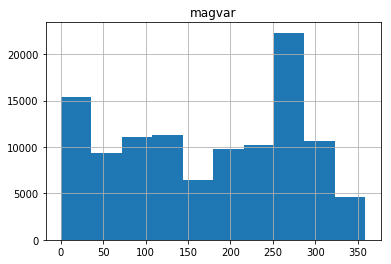

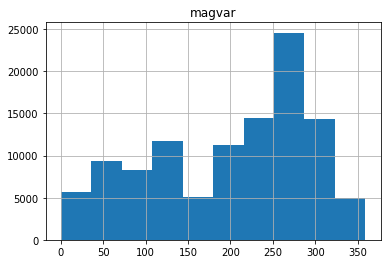

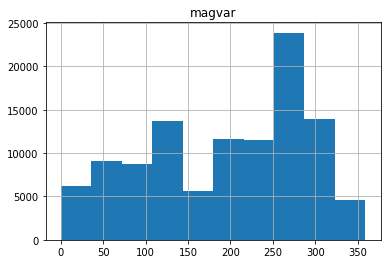

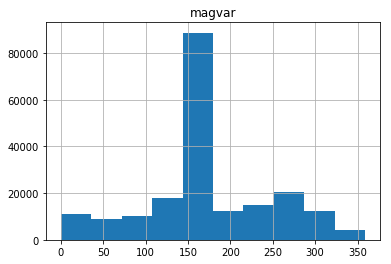

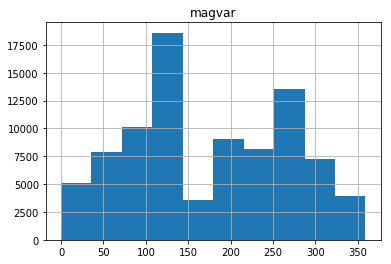

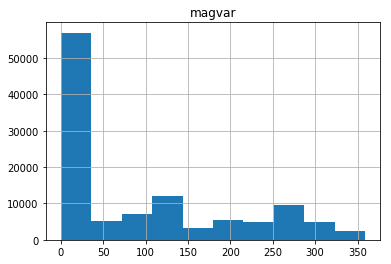

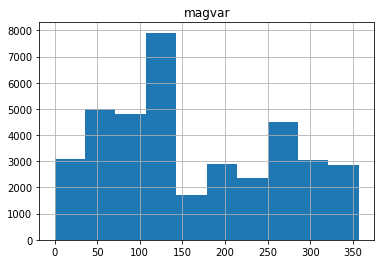

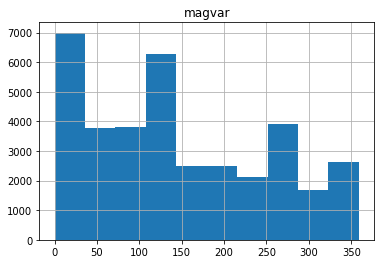

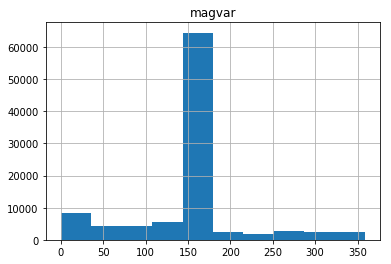

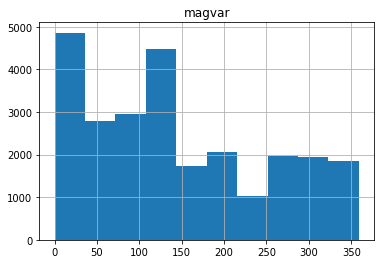

In [67]:
al[['hour', 'magvar']].groupby('hour').hist()

In [144]:
df_day = al[['day', 'uuid']].groupby('day').count().reset_index()
df_weekday = al[['weekday', 'uuid']].groupby('weekday').count().reset_index()
df_hour = al[['hour', 'uuid']].groupby('hour').count().reset_index()

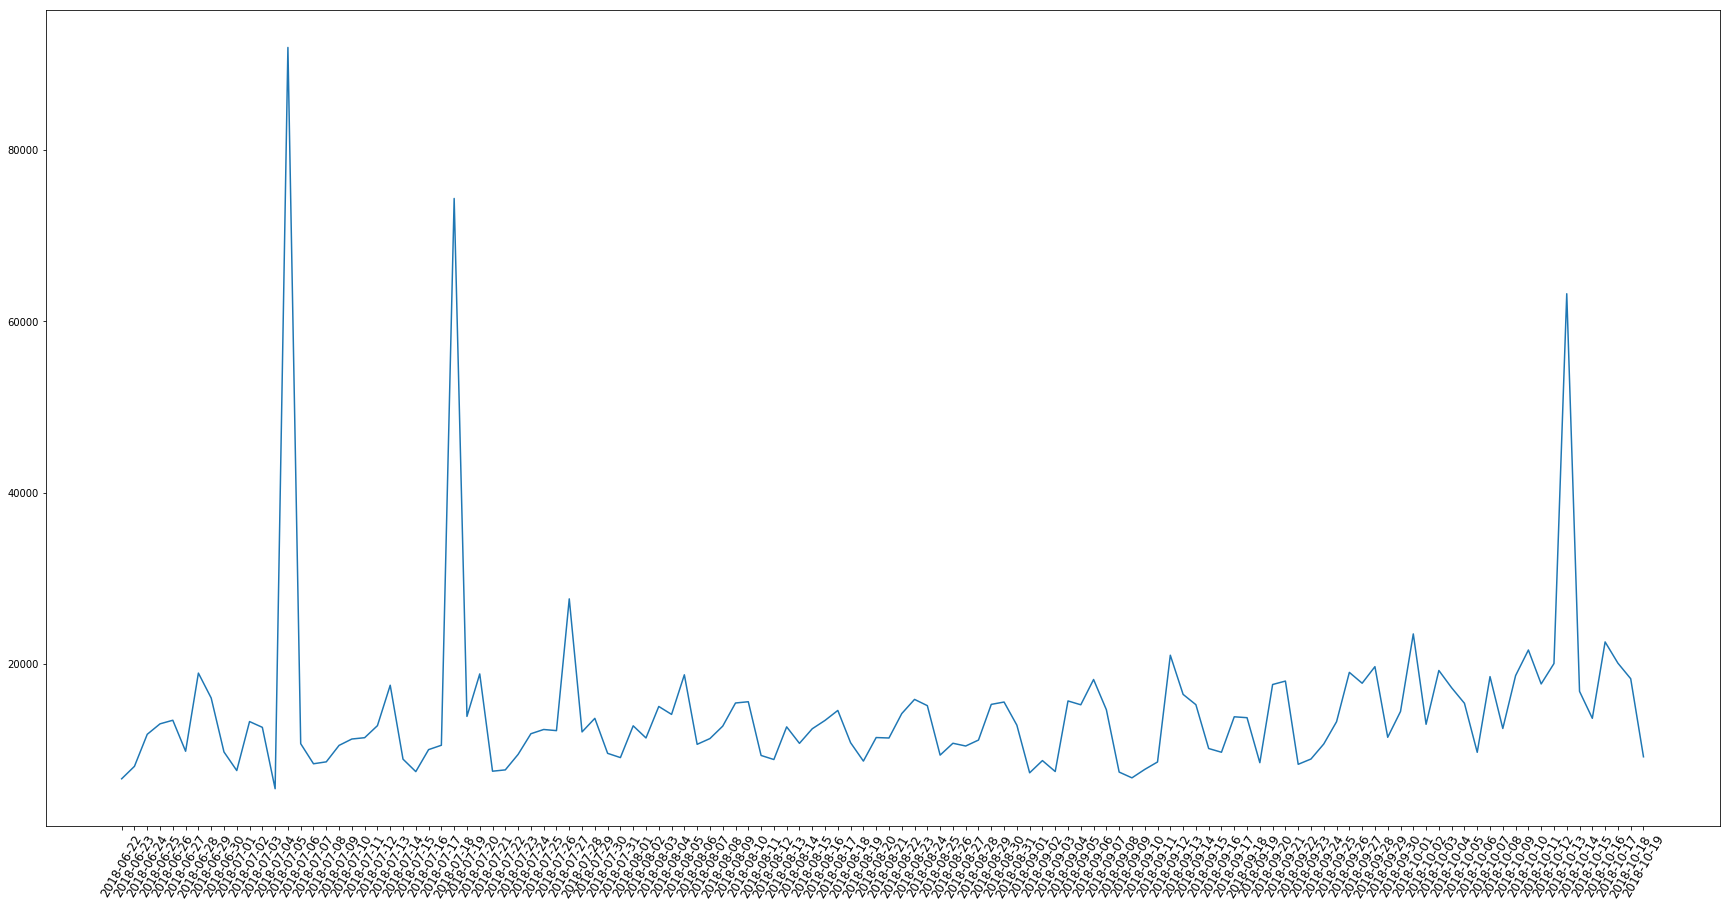

In [94]:
plt.figure(figsize=(30,15))
ax = plt.gca()
plt.plot(df_day['day'], df_day['uuid'])
ax.set_xticklabels(df_day['day'].tolist(), rotation=60, fontsize=12)
plt.show()

In [162]:
weight = al.groupby('day').mean()['weekday'].reset_index().groupby('weekday').count()['day'].reset_index()['day'].tolist()

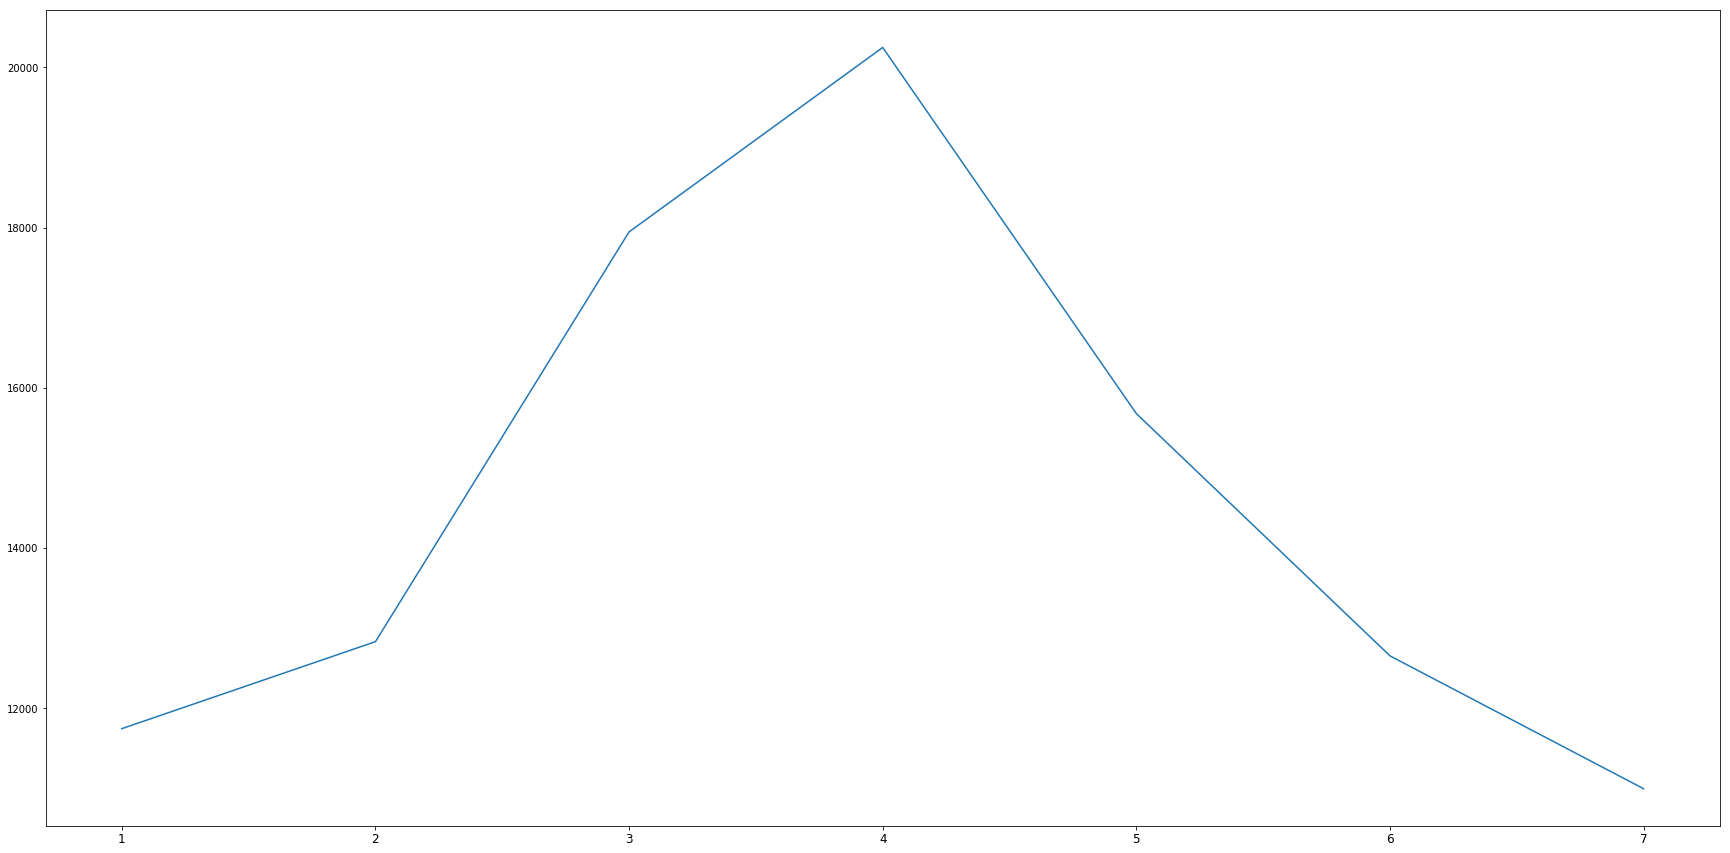

In [168]:
plt.figure(figsize=(30,15))
ax = plt.gca()
plt.plot(df_weekday['weekday'], df_weekday['uuid']/weight)
ax.set_xticks(range(1, 8))
ax.set_xticklabels(df_weekday['weekday'].tolist(), fontsize=12)
plt.show()

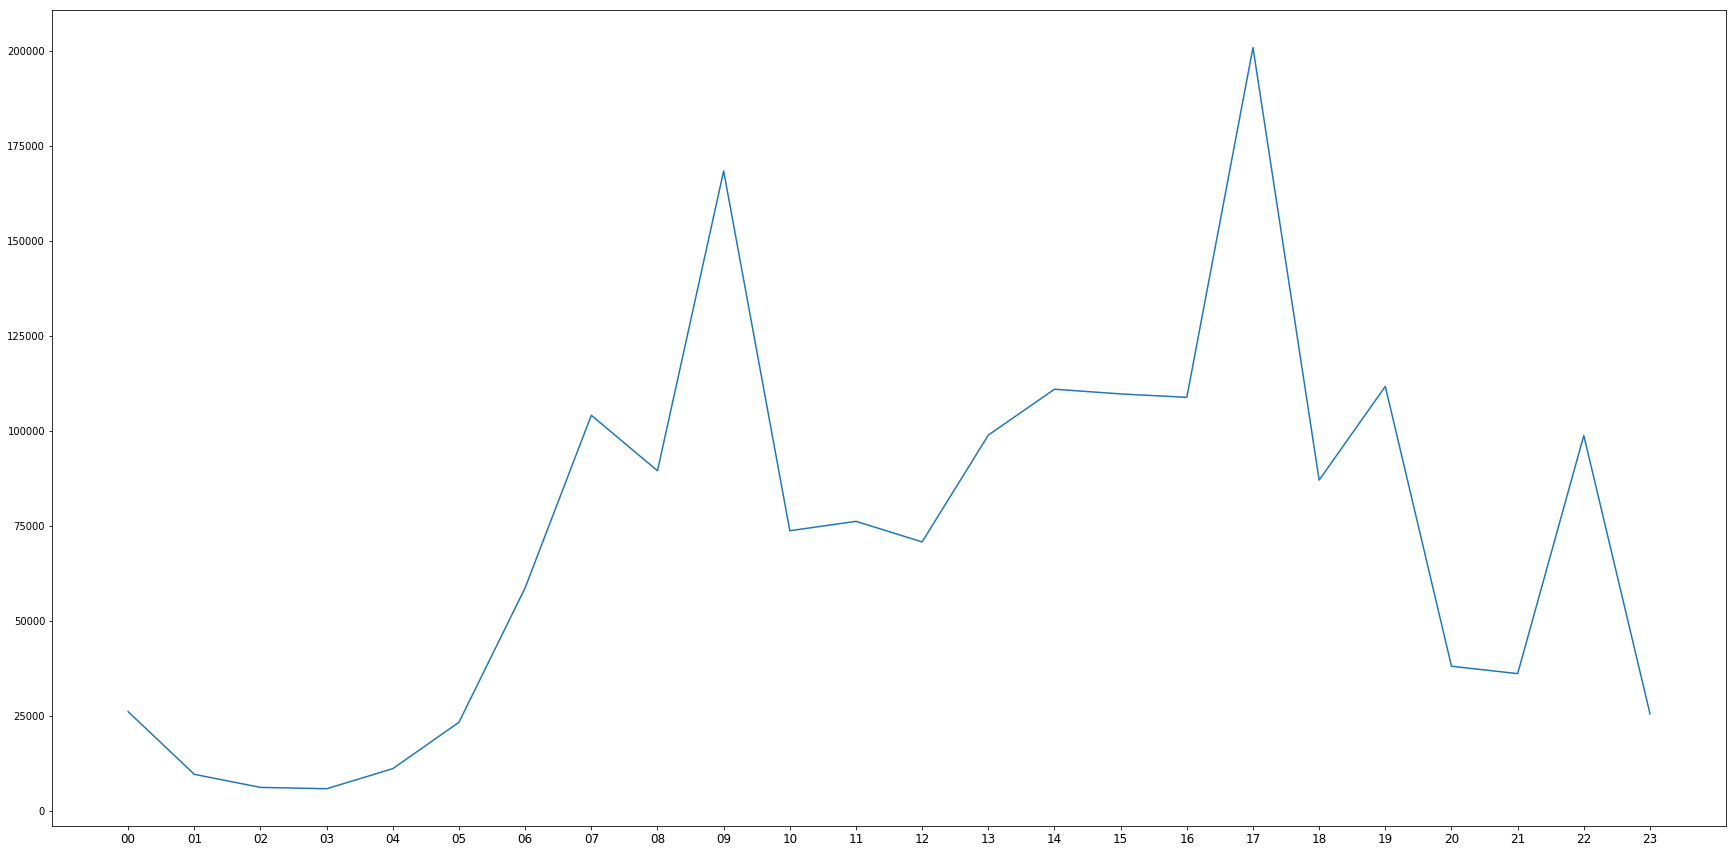

In [170]:
plt.figure(figsize=(30,15))
ax = plt.gca()
plt.plot(df_hour['hour'], df_hour['uuid'])
ax.set_xticks(range(0, 24))
ax.set_xticklabels(df_hour['hour'].tolist(), fontsize=12)
plt.show()

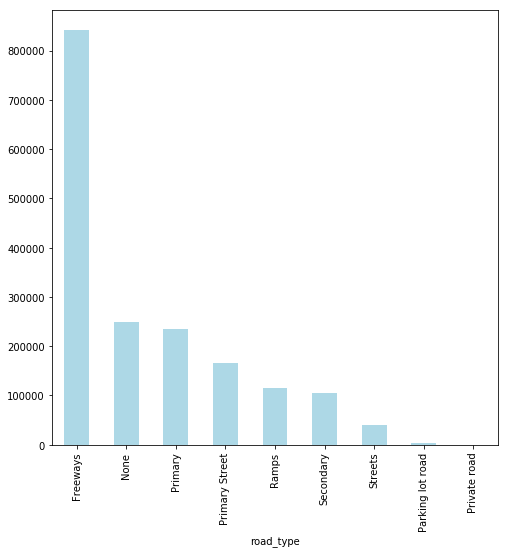

In [113]:
plt.figure(figsize=(8,8))
al.groupby('road_type').count()['uuid'].sort_values(ascending=False).plot.bar(color='lightblue')
plt.show()

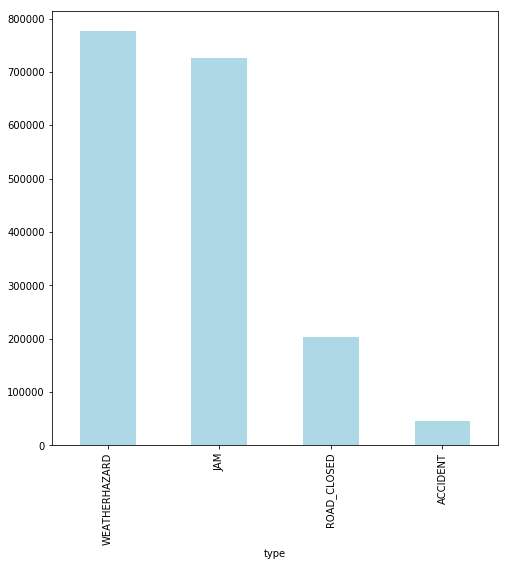

In [114]:
plt.figure(figsize=(8,8))
al.groupby('type').count()['uuid'].sort_values(ascending=False).plot.bar(color='lightblue')
plt.show()

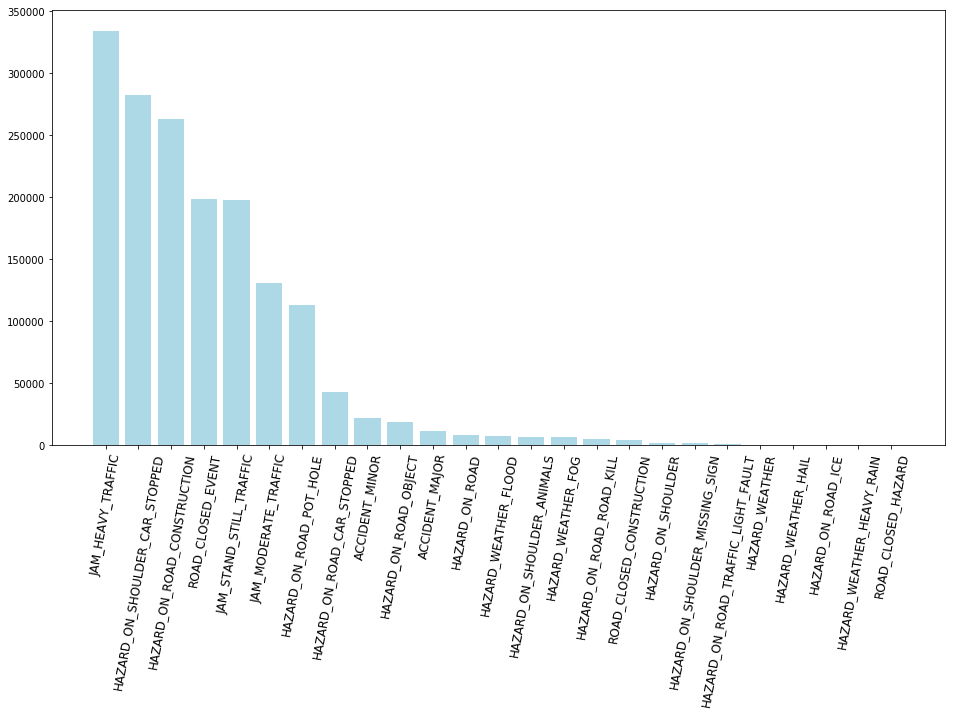

In [139]:
df_subtype = al.groupby('subtype').count()['uuid'].sort_values(ascending=False).reset_index()
plt.figure(figsize=(16,8))
ax = plt.gca()
ax.bar(df_subtype['subtype'], df_subtype['uuid'], color = 'lightblue')
ax.set_xticks(range(df_subtype.shape[0]))
ax.set_xticklabels(df_subtype['subtype'].tolist(), rotation=80, fontsize=12)
plt.show()

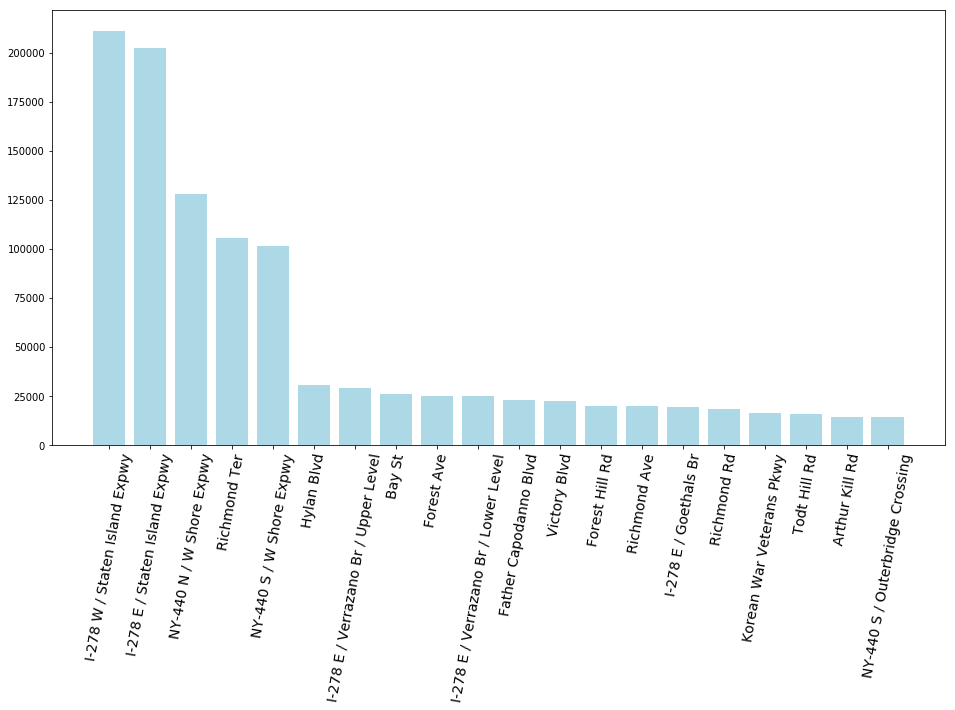

In [143]:
df_subtype = al.groupby('street').count()['uuid'].sort_values(ascending=False).reset_index()[:20]
plt.figure(figsize=(16,8))
ax = plt.gca()
ax.bar(df_subtype['street'], df_subtype['uuid'], color = 'lightblue')
ax.set_xticks(range(df_subtype.shape[0]))
ax.set_xticklabels(df_subtype['street'].tolist(), rotation=80, fontsize=14)
plt.show()

### Jams

In [8]:
%%time
jm = transform_jams(jams)

/Users/Louis/Documents/4A/3_Semester/Capstone/Sandbox/capstone_env/lib/python3.6/site-packages/pandas/core/frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


CPU times: user 40.7 s, sys: 1.27 s, total: 42 s
Wall time: 42.9 s


/Users/Louis/Documents/4A/3_Semester/Capstone/capstone_NYCxDSI/transform_waze_raw_functions.py:131: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  jams['road_type'] = jams.road_type.astype('float64').apply(translate_road_type)


In [9]:
cols_categorical_data = []
for col in jm.columns[jm.dtypes == object]:
    s = jm[pd.isnull(jm[col])].shape[0]
    cols_categorical_data.append({
        'Col': col,
        'NumVals': jm[col].value_counts().shape[0],
        'PctNumVals': jm[col].value_counts().shape[0]/jm.shape[0],
        'MaxValCount': jm[col].value_counts().max(),
        'PctMaxValCount': jm[col].value_counts().max()/jm.shape[0],
        'NumNaNs': s,
        'PctNaNs': s/jm.shape[0]
    })
cols_categorical_data_pd = pd.DataFrame(cols_categorical_data) 
cols_categorical_data_pd

,Col,MaxValCount,NumNaNs,NumVals,PctMaxValCount,PctNaNs,PctNumVals
0,blocking_alert_uuid,8665,1066653,1039,0.006849,0.843153,8.212939e-04
1,city,1265077,0,1,1.000000,0.000000,7.904657e-07
2,state,1265077,0,1,1.000000,0.000000,7.904657e-07
3,country,1265077,0,1,1.000000,0.000000,7.904657e-07
4,end_node,64129,96823,2469,0.050692,0.076535,1.951660e-03
5,line,19789,0,45993,0.015643,0.000000,3.635589e-02
6,road_type,603567,0,8,0.477099,0.000000,6.323726e-06
7,street,114600,1551,1811,0.090587,0.001226,1.431533e-03
8,segments,338062,0,45,0.267226,0.000000,3.557096e-05
9,turn_type,1265077,0,1,1.000000,0.000000,7.904657e-07


In [10]:
jm.dro

NONE      1225448
Small       22932
Medium      12059
Large        4617
Huge           21
Name: type, dtype: int64

### Irregularities

In [11]:
irr = transform_irreg(irregularities)

In [12]:
irr.dtypes

id                         int64
alerts                    object
alerts_count               int64
cause_alert               object
cause_type                object
city                      object
state                     object
country                   object
delay_seconds              int64
detection_date            object
detection_date_millis      int64
detection_utc_date        object
drivers_count              int64
end_node                  object
highway                     bool
jam_level                  int64
length                     int64
line                      object
n_comments                 int64
start_node               float64
n_images                   int64
n_thumbs_up                int64
regular_speed            float64
seconds                    int64
severity                   int64
speed                    float64
street                    object
trend                      int64
type                      object
update_date               object
update_dat

In [13]:
cols_categorical_data = []
for col in irr.columns[irr.dtypes == object]:
    s = irr[pd.isnull(irr[col])].shape[0]
    cols_categorical_data.append({
        'Col': col,
        'NumVals': irr[col].value_counts().shape[0],
        'PctNumVals': irr[col].value_counts().shape[0]/irr.shape[0],
        'MaxValCount': irr[col].value_counts().max(),
        'PctMaxValCount': irr[col].value_counts().max()/irr.shape[0],
        'NumNaNs': s,
        'PctNaNs': s/irr.shape[0]
    })
cols_categorical_data_pd = pd.DataFrame(cols_categorical_data) 
cols_categorical_data_pd

,Col,MaxValCount,NumNaNs,NumVals,PctMaxValCount,PctNaNs,PctNumVals
0,alerts,12565,0,11078,0.317723,0.000000,0.280122
1,cause_alert,19,35714,1261,0.000480,0.903077,0.031886
2,cause_type,3833,32551,2,0.096923,0.823097,0.000051
3,city,39547,0,1,1.000000,0.000000,0.000025
4,state,39547,0,1,1.000000,0.000000,0.000025
5,country,39547,0,1,1.000000,0.000000,0.000025
6,detection_date,271,0,2018,0.006853,0.000000,0.051028
7,detection_utc_date,271,0,2026,0.006853,0.000000,0.051230
8,end_node,3428,1015,331,0.086682,0.025666,0.008370
9,line,1605,0,3338,0.040585,0.000000,0.084406


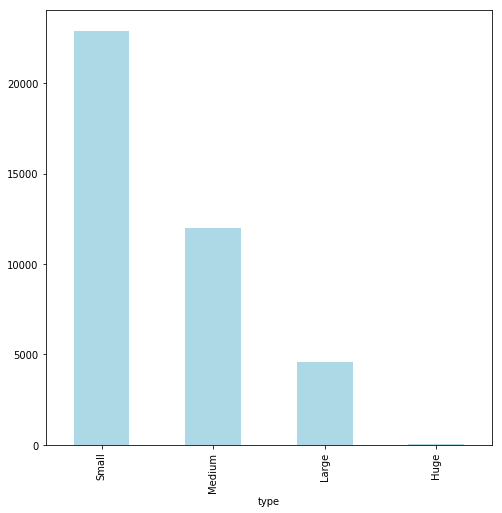

In [177]:
plt.figure(figsize=(8,8))
irr.groupby('type').count()['id'].sort_values(ascending=False).plot.bar(color='lightblue')
plt.show()

In [178]:
df_irr = irr.groupby(['street', 'type']).count()['id'].reset_index()

In [187]:
df_irr_large = df_irr[df_irr['type'] == 'Large'][['street', 'id']].sort_values(by=['id'], ascending=False)[:20]

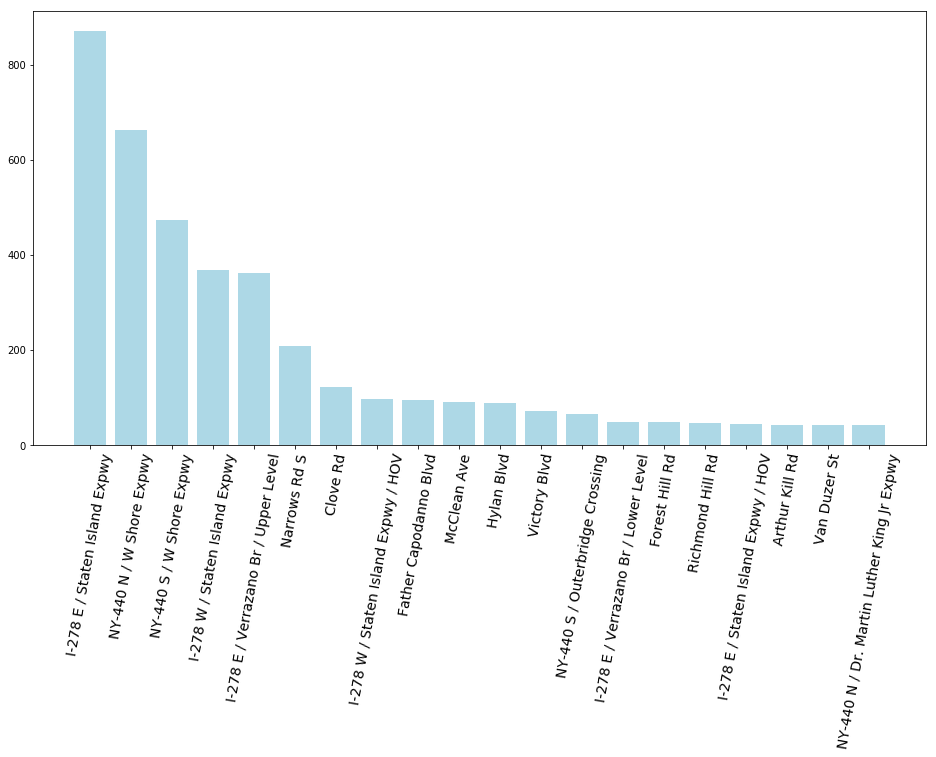

In [189]:
plt.figure(figsize=(16,8))
ax = plt.gca()
ax.bar(df_irr_large['street'], df_irr_large['id'], color = 'lightblue')
ax.set_xticks(range(df_irr_large.shape[0]))
ax.set_xticklabels(df_irr_large['street'].tolist(), rotation=80, fontsize=14)
plt.show()